In [172]:
import pandas as pd

In [173]:
df = pd.read_csv('dataset_results.csv')


C:\Users\kacpe\AppData\Local\Temp\ipykernel_23840\1025548803.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset_results.csv')


In [174]:
df = df[df.results.notna()]

In [175]:
df = df.drop(df[df.results == 'Time limit reached.\r\n'].index)
df = df.drop(df[df.results == 'No solution exists.\r\n'].index)
#df = df.drop(df[df.results == 'key_action1(char_acting)\r\n'].index)
#df = df.drop(df[df.results == 'key_action2(char_acting)\r\n'].index)
#df = df.drop(df[df.results == 'key_action3(char_acting)\r\n'].index)
#df = df.drop(df[df.results == 'unblock_yourself(char_acting)'].index)
df.reset_index(inplace=True,drop=True)


In [176]:
df

,acting_character,Alice_alive,Alice_underArrest,Alice_angry,Alice_suspect,Alice_at,Bob_alive,Bob_underArrest,Bob_angry,Bob_suspect,...,Theft_Bat_BasketballCourt_clues,Theft_Bat_Downtown_clues,Murder_Basketball_HomeB_clues,Murder_Basketball_BasketballCourt_clues,Murder_Basketball_Downtown_clues,Murder_Bat_HomeB_clues,Murder_Bat_BasketballCourt_clues,Murder_Bat_Downtown_clues,results,time
0,Sherlock,0,0,1,Murder,Downtown,1,0,0,Theft,...,0,0,0,0,0,0,0,0,"travel(Sherlock, Downtown, HomeB) arrest(Sherl...",0.664436
1,Alice,1,0,1,Theft,BasketballCourt,1,1,0,Theft,...,0,0,0,0,0,0,0,1,"play_basketball(Alice, Bob, BasketballCourt)\r\n",0.688266
2,Charlie,1,0,1,Murder,BasketballCourt,1,0,0,Murder,...,0,0,0,0,0,0,0,0,"travel(Charlie, Downtown, BasketballCourt) ste...",0.881503
3,Sherlock,0,1,0,Theft,Downtown,1,1,0,Murder,...,1,0,0,0,0,0,0,0,"find_clues(Sherlock, Theft, Basketball, HomeB)...",0.928684
4,Sherlock,0,1,1,Theft,HomeB,1,0,0,Murder,...,1,0,0,0,0,0,0,0,"travel(Sherlock, HomeB, Downtown) arrest(Sherl...",0.911763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,Charlie,1,1,1,Murder,BasketballCourt,1,0,0,Theft,...,0,0,0,0,0,0,0,0,"kill(Charlie, Alice, Basketball, BasketballCou...",1.220299
1840,Sherlock,0,1,0,Theft,BasketballCourt,1,0,1,Theft,...,0,1,0,0,0,0,0,0,"find_clues(Sherlock, Theft, Basketball, Basket...",1.261440
1841,Sherlock,1,1,0,Murder,Downtown,1,0,1,Theft,...,0,0,0,0,0,0,0,0,"arrest(Sherlock, Charlie, Downtown, Murder)\r\n",1.246803
1842,Charlie,1,1,0,Theft,HomeB,1,1,1,Theft,...,0,1,0,0,0,0,0,0,"travel(Charlie, Downtown, HomeB) kill(Charlie,...",1.449221


In [177]:
df.results.value_counts()

find_clues(Sherlock, Theft, Basketball, BasketballCourt)\r\n                                                                            195
find_clues(Sherlock, Theft, Basketball, Downtown)\r\n                                                                                   195
find_clues(Sherlock, Theft, Basketball, HomeB)\r\n                                                                                      186
travel(Sherlock, BasketballCourt, HomeB) find_clues(Sherlock, Theft, Basketball, HomeB)\r\n                                              75
travel(Sherlock, Downtown, HomeB) find_clues(Sherlock, Theft, Basketball, HomeB)\r\n                                                     74
                                                                                                                                       ... 
travel(Charlie, BasketballCourt, HomeB) steal(Charlie, Bob, Bat, HomeB) kill(Charlie, Alice, Bat, HomeB)\r\n                              1
travel(Bob, HomeB, B

In [178]:

action = df.at[3,'results'].split(' ')[0]
action = action.replace('(',' ')
action = action.split(' ')
print(action)
only_action = action[0]
variables = action[1][:-1].split(', ')

print(only_action)
print(variables)

['find_clues', 'Sherlock,']
find_clues
['Sherlock']


In [179]:
df_effects = pd.read_csv('basketball_effects_nn.csv')

In [180]:
def removern(row):
    if 'results' in row.index:
        row.results = row.results.replace('\r','')
        row.results = row.results.replace('\n','')
        row.results = row.results.replace('\t','')
    if 'effect' in row.index:
        row.effect = row.effect.replace('\r','')
        row.effect = row.effect.replace('\n','')
        row.effect = row.effect.replace('\t','')
    return row

In [181]:
df = df.apply(removern,axis=1)

In [182]:
df_effects = df_effects.apply(removern,axis=1)

In [183]:
df_effects

,action,effect,effect_function
0,lose_support_authority,"!supports(char2,char3);support(char3) - 1",arg2_supports_arg3:=_0;arg3_support:-_1\n
1,travel,at(character) = to;,arg1_at:=_arg3
2,arrest,underArrest(character) = 1;,arg2_underArrest:=_1
3,steal,has(item) = thief ;angry(victim) = 1 ;clue(The...,arg3_has:=_arg1;arg2_angry:=_1;Theft_arg3_arg4...
4,play_basketball,angry(player1) = 0 ;angry(player2) = 0;,arg1_angry:=_0;arg2_angry:=_0
5,kill,"!alive(victim);clue(Murder, item, place);",arg2_alive:=_0;Murder_arg3_arg4_clues:=_1
6,find_clues,searched(place) = 1 ;,arg4_searched:=_1
7,share_clues,"believes(police2, clue(crime, item, place));",arg3_arg4_arg5_clues:=_1
8,suspect_of_crime,"suspect(citizen, crime);",arg2_suspect:=_arg3


In [184]:
def replace_effect(effect,args):
	for count,arg in enumerate(args,0):			
		effect = effect.replace('arg'+str(count+1),arg)
	
	return effect
					
						


In [185]:
def create_result(df ,row):
    
    
    actions = row.results.split(') ')

    action = actions[0]
    action = action.split('(')
    only_action = action[0]
    
    variables = action[1].replace(')','').split(', ')
    #print(variables)
    new_row = row
    effects= df_effects[df_effects.action == action[0]].effect_function
        
    if len(effects) > 0:
        for effect in str(effects.values[0]).split(';'):
            new_row.results = replace_effect(effect,variables) 
            df.loc[len(df)] = new_row

        #df.drop(index)
    return only_action
        #musi być action_variables albo najlepiej co się zmienia
    

In [186]:
df2 = pd.DataFrame(columns = df.columns)
for index, row in df.iterrows():
    create_result(df2,row)
    
#df['result'] = df.apply(create_result,axis=1)
#df = df.drop(['results'],axis=1)

df = df2
df.rename({'results':'result'},axis=1,inplace=True)


In [187]:

df

,acting_character,Alice_alive,Alice_underArrest,Alice_angry,Alice_suspect,Alice_at,Bob_alive,Bob_underArrest,Bob_angry,Bob_suspect,...,Theft_Bat_BasketballCourt_clues,Theft_Bat_Downtown_clues,Murder_Basketball_HomeB_clues,Murder_Basketball_BasketballCourt_clues,Murder_Basketball_Downtown_clues,Murder_Bat_HomeB_clues,Murder_Bat_BasketballCourt_clues,Murder_Bat_Downtown_clues,result,time
0,Sherlock,0,0,1,Murder,Downtown,1,0,0,Theft,...,0,0,0,0,0,0,0,0,Sherlock_at:=_HomeB,0.664436
1,Alice,1,0,1,Theft,BasketballCourt,1,1,0,Theft,...,0,0,0,0,0,0,0,1,Alice_angry:=_0,0.688266
2,Alice,1,0,1,Theft,BasketballCourt,1,1,0,Theft,...,0,0,0,0,0,0,0,1,Bob_angry:=_0,0.688266
3,Charlie,1,0,1,Murder,BasketballCourt,1,0,0,Murder,...,0,0,0,0,0,0,0,0,Charlie_at:=_BasketballCourt,0.881503
4,Sherlock,0,1,0,Theft,Downtown,1,1,0,Murder,...,1,0,0,0,0,0,0,0,HomeB_searched:=_1,0.928684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,Charlie,1,1,1,Murder,BasketballCourt,1,0,0,Theft,...,0,0,0,0,0,0,0,0,Murder_Basketball_BasketballCourt_clues:=_1,1.220299
2031,Sherlock,0,1,0,Theft,BasketballCourt,1,0,1,Theft,...,0,1,0,0,0,0,0,0,BasketballCourt_searched:=_1,1.26144
2032,Sherlock,1,1,0,Murder,Downtown,1,0,1,Theft,...,0,0,0,0,0,0,0,0,Charlie_underArrest:=_1,1.246803
2033,Charlie,1,1,0,Theft,HomeB,1,1,1,Theft,...,0,1,0,0,0,0,0,0,Charlie_at:=_HomeB,1.449221


In [194]:
df = df.convert_dtypes()

In [197]:
categorical = [x for x in df.columns if df[x].dtype == 'string' and x != 'result'] 
#categorical = ['char_acting_state','char1_state','char2_state'] 
print(categorical)

['acting_character', 'Alice_suspect', 'Alice_at', 'Bob_suspect', 'Bob_at', 'Charlie_suspect', 'Charlie_at', 'Sherlock_suspect', 'Sherlock_at', 'Basketball_has', 'Bat_has']


In [198]:
from sklearn.preprocessing import OneHotEncoder
from collections import defaultdict

#d = defaultdict(OneHotEncoder)


# Encoding the variable
#df = df.apply(lambda x: d[x.name].fit_transform(x))
# Inverse the encoded
#df.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
#df.apply(lambda x: d[x.name].transform(x))

df = pd.get_dummies(df, columns = categorical)



In [199]:
df.result.value_counts()

Sherlock_at:=_HomeB                            265
BasketballCourt_searched:=_1                   195
Downtown_searched:=_1                          195
HomeB_searched:=_1                             186
Sherlock_at:=_BasketballCourt                  174
Bob_underArrest:=_1                            129
Alice_underArrest:=_1                          119
Charlie_underArrest:=_1                        115
Sherlock_at:=_Downtown                         105
Charlie_at:=_HomeB                              80
Charlie_at:=_BasketballCourt                    78
Charlie_at:=_Downtown                           68
Alice_angry:=_1                                 43
Alice_alive:=_0                                 40
Basketball_has:=_Charlie                        34
Bat_has:=_Charlie                               28
Bob_angry:=_1                                   22
Theft_Basketball_HomeB_clues:=_1                18
Bob_angry:=_0                                   17
Alice_angry:=_0                

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [201]:
features = ['char_acting_altruism',	'char_acting_ambition','char_acting_fighting_ability']

#df2 = df[features]
df2 = df

In [202]:
df2

,Alice_alive,Alice_underArrest,Alice_angry,Bob_alive,Bob_underArrest,Bob_angry,Charlie_alive,Charlie_underArrest,Charlie_angry,Sherlock_alive,...,Basketball_has_?,Basketball_has_Alice,Basketball_has_Bob,Basketball_has_Charlie,Basketball_has_Sherlock,Bat_has_?,Bat_has_Alice,Bat_has_Bob,Bat_has_Charlie,Bat_has_Sherlock
0,0,0,1,1,0,0,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0
1,1,0,1,1,1,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,1,0,1,1,1,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,1,0,1,1,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,0,1,0,1,1,0,1,1,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,1,1,1,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2031,0,1,0,1,0,1,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2032,1,1,0,1,0,1,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0
2033,1,1,0,1,1,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [203]:
y = df.result
X = df.drop('result',axis=1)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [205]:
clf = DecisionTreeClassifier(random_state=12345, max_depth=5,class_weight='balanced') 
model = clf.fit(X_train,y_train)
y_pred = model.predict(X_test)
# get importance


In [206]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5784313725490197


<AxesSubplot: >

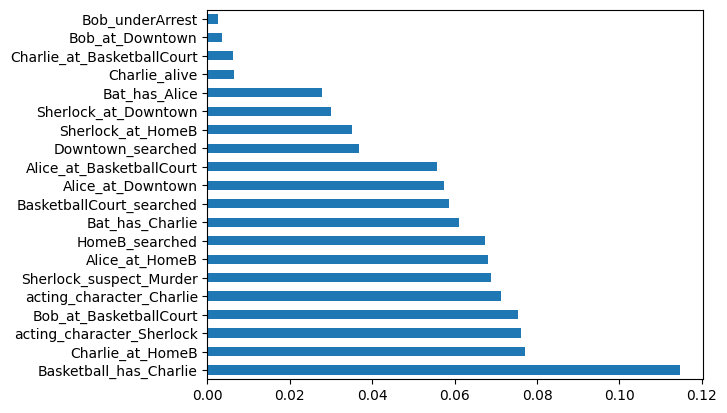

In [207]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [208]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 if v > 0:
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


Feature: 4, Score: 0.00254
Feature: 6, Score: 0.00645
Feature: 12, Score: 0.06742
Feature: 13, Score: 0.05851
Feature: 14, Score: 0.03688
Feature: 30, Score: 0.07128
Feature: 31, Score: 0.07610
Feature: 34, Score: 0.05580
Feature: 35, Score: 0.05734
Feature: 36, Score: 0.06805
Feature: 39, Score: 0.07544
Feature: 40, Score: 0.00348
Feature: 44, Score: 0.00624
Feature: 46, Score: 0.07718
Feature: 47, Score: 0.06885
Feature: 50, Score: 0.02998
Feature: 51, Score: 0.03498
Feature: 55, Score: 0.11466
Feature: 58, Score: 0.02785
Feature: 60, Score: 0.06096


In [209]:
[str(x) for x  in list(y.unique())]

['Sherlock_at:=_HomeB',
 'Alice_angry:=_0',
 'Bob_angry:=_0',
 'Charlie_at:=_BasketballCourt',
 'HomeB_searched:=_1',
 'Sherlock_at:=_Downtown',
 'Sherlock_at:=_BasketballCourt',
 'Alice_underArrest:=_1',
 'Bob_underArrest:=_1',
 'Bat_has:=_Charlie',
 'Alice_angry:=_1',
 'Theft_Bat_Downtown_clues:=_1',
 'Basketball_has:=_Charlie',
 'Theft_Basketball_HomeB_clues:=_1',
 'Charlie_underArrest:=_1',
 'Theft_Basketball_BasketballCourt_clues:=_1',
 'Downtown_searched:=_1',
 'Charlie_at:=_Downtown',
 'Alice_alive:=_0',
 'Murder_Bat_HomeB_clues:=_1',
 'Charlie_at:=_HomeB',
 'Bob_at:=_BasketballCourt',
 'Murder_Basketball_Downtown_clues:=_1',
 'BasketballCourt_searched:=_1',
 'Bob_angry:=_1',
 'Murder_Bat_Downtown_clues:=_1',
 'Theft_Basketball_Downtown_clues:=_1',
 'Murder_Basketball_HomeB_clues:=_1',
 'Murder_Basketball_BasketballCourt_clues:=_1',
 'Theft_Bat_HomeB_clues:=_1',
 'Murder_Bat_BasketballCourt_clues:=_1',
 'Basketball_has:=_Bob',
 'Charlie_angry:=_1',
 'Bob_at:=_Downtown',
 'Theft_

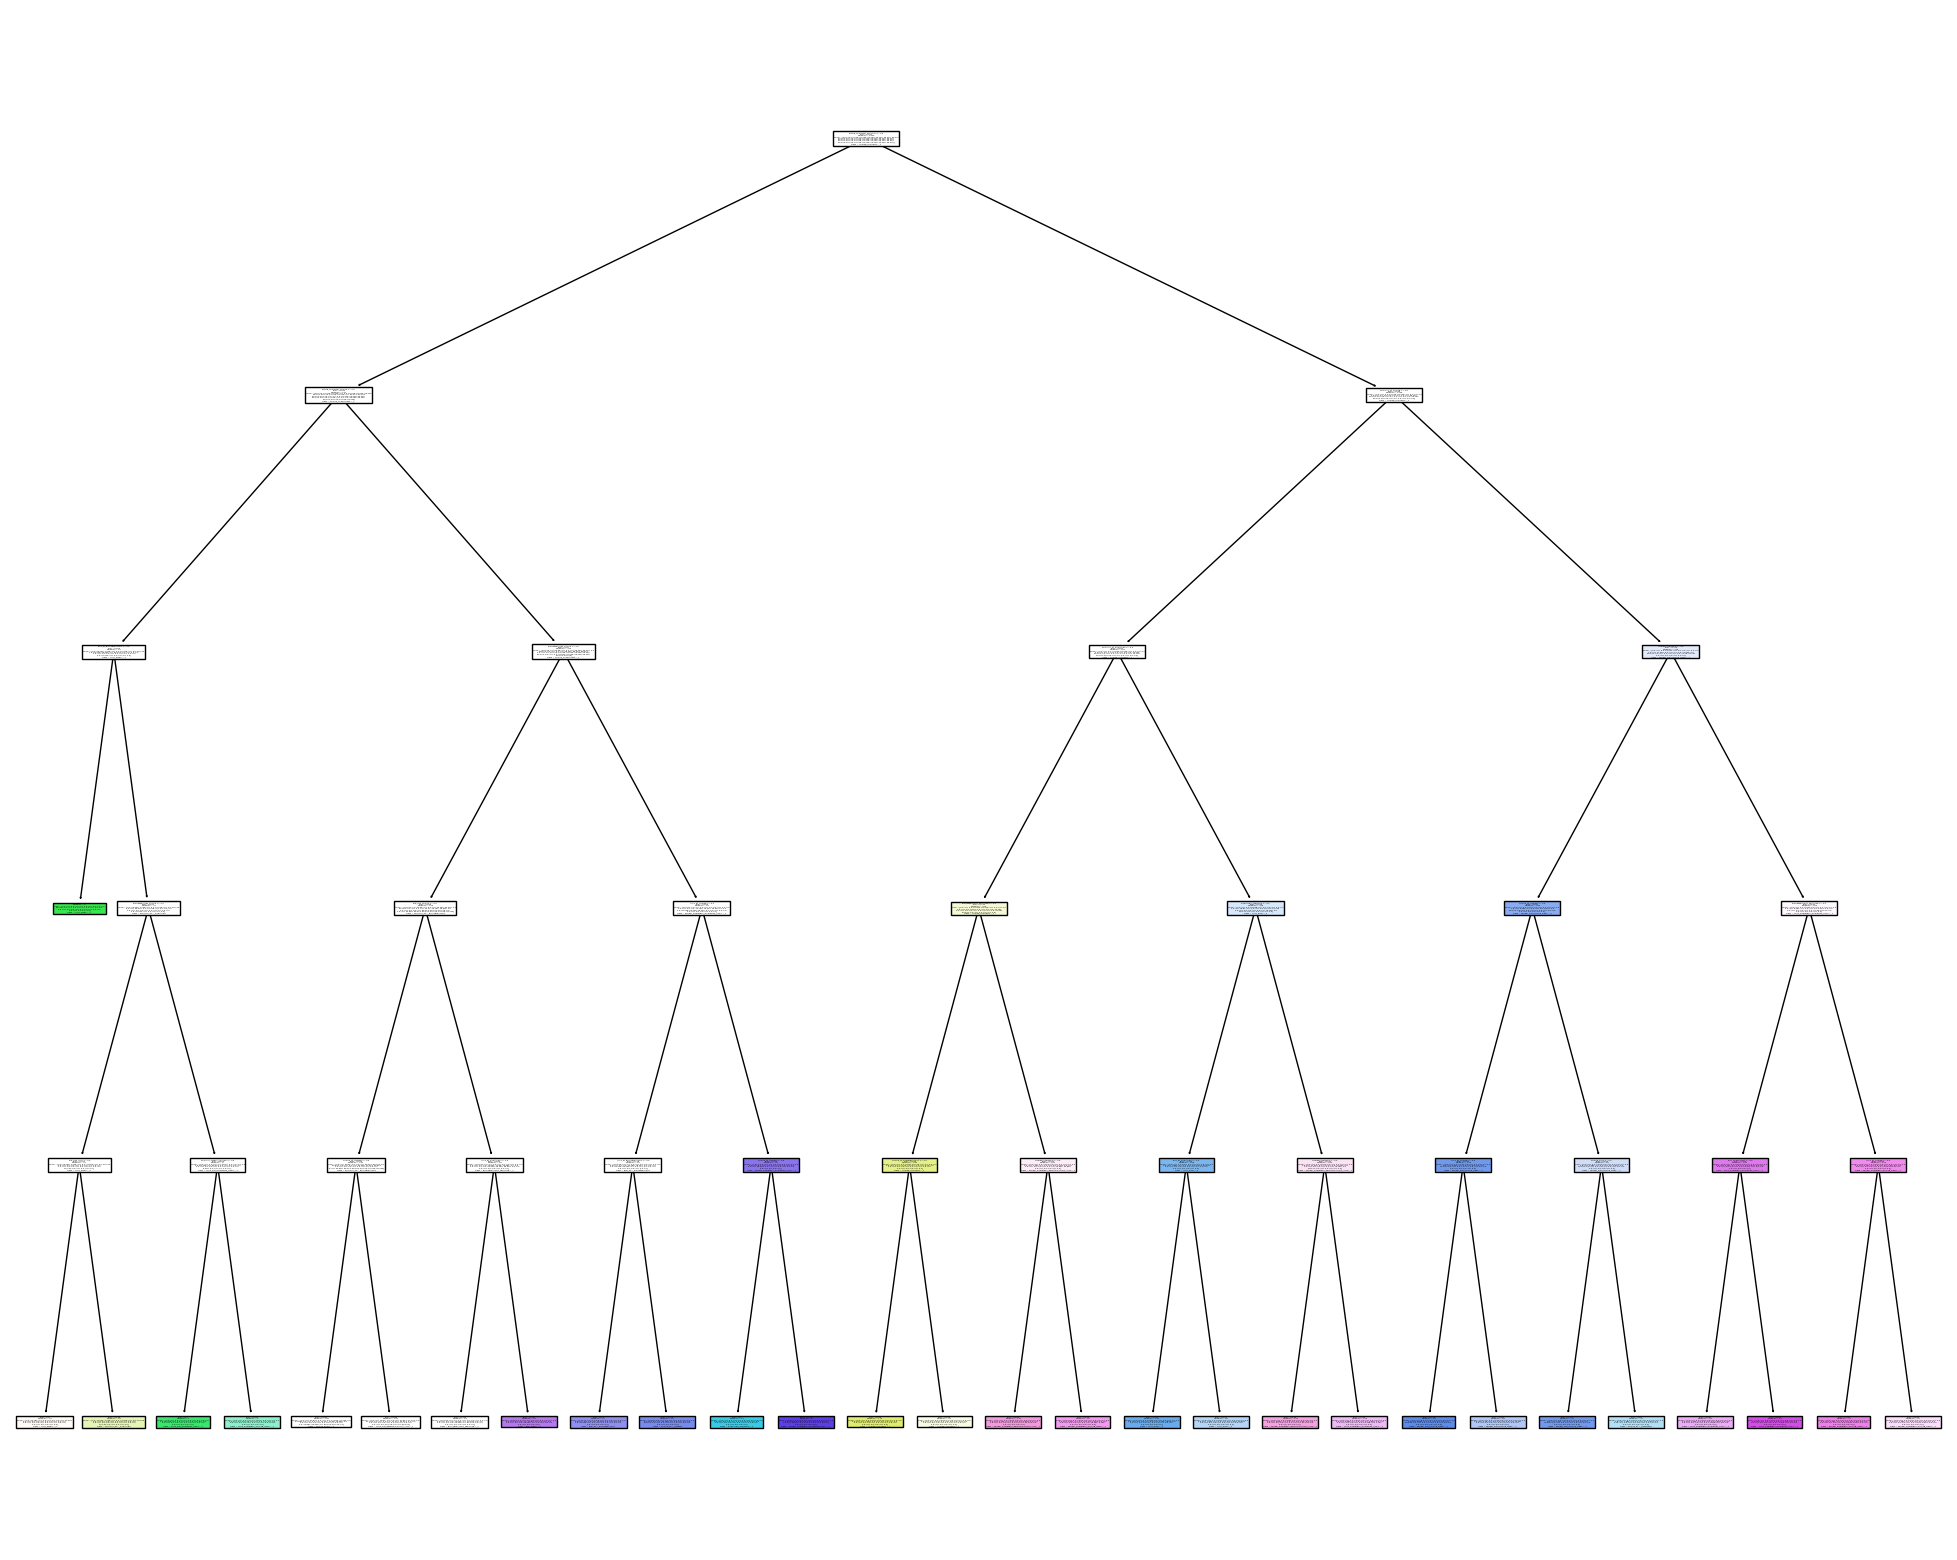

In [210]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=[str(x) for x  in list(y.unique())],
                   filled=True)

In [211]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names,pr):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths, pr):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths,pr)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths,pr)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths,pr)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "

        classes = path[-1][0][0]
        l = np.argmax(classes)
        proba = np.round(100.0*classes[l]/np.sum(classes),2)

        

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            
            rule += f"class: {class_names[l]} (proba: {proba}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        if(proba >= pr):  rules += [rule]
        
    return rules

In [212]:
rules = get_rules(clf, X.columns, [str(x) for x  in list(y.unique())],75)

for r in rules:
    print(r)

if (acting_character_Sherlock > 0.5) and (Sherlock_at_HomeB <= 0.5) and (Sherlock_at_Downtown <= 0.5) and (BasketballCourt_searched <= 0.5) and (Charlie_at_BasketballCourt <= 0.5) then class: HomeB_searched:=_1 (proba: 77.55%) | based on 172 samples
if (acting_character_Sherlock > 0.5) and (Sherlock_at_HomeB <= 0.5) and (Sherlock_at_Downtown > 0.5) and (Downtown_searched <= 0.5) and (Bob_at_Downtown <= 0.5) then class: Alice_alive:=_0 (proba: 79.07%) | based on 152 samples
if (acting_character_Sherlock > 0.5) and (Sherlock_at_HomeB > 0.5) and (HomeB_searched <= 0.5) and (Charlie_at_HomeB <= 0.5) and (Alice_at_HomeB <= 0.5) then class: Murder_Bat_HomeB_clues:=_1 (proba: 84.73%) | based on 99 samples
if (acting_character_Sherlock > 0.5) and (Sherlock_at_HomeB > 0.5) and (HomeB_searched > 0.5) and (BasketballCourt_searched <= 0.5) and (Bob_underArrest > 0.5) then class: Theft_Basketball_Downtown_clues:=_1 (proba: 89.85%) | based on 56 samples
if (acting_character_Sherlock > 0.5) and (Sher

In [ ]:
import tensorflow_decision_forests as tfdf

import tensorflow as tf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

import dtreeviz

from matplotlib import pyplot as plt
from IPython import display

ModuleNotFoundError: No module named 'tensorflow_decision_forests'

In [ ]:
def split_dataset(dataset, test_ratio=0.30, seed=1234):
  """
  Splits a panda dataframe in two, usually for train/test sets.
  Using the same random seed ensures we get the same split so
  that the description in this tutorial line up with generated images.
  """
  np.random.seed(seed)
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

In [ ]:
label = "result"   # Name of the classification target label
classes = list(df[label].unique())
df[label] = df[label].map(classes.index)

print(f"Target '{label}'' classes: {classes}")
df.head(3)

In [ ]:
# Split into training and test sets
train_ds_pd, test_ds_pd = split_dataset(df)
print(f"{len(train_ds_pd)} examples in training, {len(test_ds_pd)} examples for testing.")

# Convert to tensorflow data sets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [ ]:
cmodel = tfdf.keras.RandomForestModel(verbose=0, random_seed=1234)
cmodel.fit(train_ds)

In [ ]:
cmodel.compile(metrics=["accuracy"])
cmodel.evaluate(test_ds, return_dict=True, verbose=0)

In [ ]:
# Tell dtreeviz about training data and model
features = [f.name for f in cmodel.make_inspector().features()]
viz_cmodel = dtreeviz.model(cmodel,
                           tree_index=3,
                           X_train=train_ds_pd[features],
                           y_train=train_ds_pd[label],
                           feature_names=features,
                           target_name=label,
                           class_names=classes)

In [ ]:
viz_cmodel.view(scale=1.2)

In [ ]:
print(viz_rmodel.explain_prediction_path(x=x))

In [ ]:
characters = ['mc','actor','actress','soldier']
lists = []
columns = []
columns.append('character')
for c in characters:
    
    

    columns.append(c+"_health")
    lists.append([i for i in range(0,3)])

    columns.append(c+"_knowledge")
    lists.append([i for i in range(0,3)])

   

    columns.append(c+"_altruism")
    lists.append([i for i in range(-2,3)])
    columns.append(c+"_ambition")
    lists.append([i for i in range(0,5)])
    
    columns.append(c+"_support")
    lists.append([i for i in range(0,2)])

    columns.append(c+"_money")
    lists.append([i for i in range(0,2)])
    
    columns.append(c+"_satisfaction")
    lists.append([0])

    columns.append(c+"_state")
    lists.append(['?','blocked','hidden'])

    char_without_c = characters.copy()
    char_without_c.remove(c)
    for c2 in char_without_c:
        columns.append(c+"_relation_"+c2)
        lists.append([i for i in range(-2,3)])
        columns.append(c+"_supports_"+c2)
        lists.append([0,1])

columns.append("ship_defense")
lists.append([-1,0,1])

columns.append("ship_status")
lists.append([-1,0,1])

columns.append("ship_magic")
lists.append([-1,0,1])

df_state = pd.DataFrame( columns=columns )
df_state

d = []
d.append('world')
for l in lists:
    d.append(random.choice(l))
df_state.loc[len(df_state)] = d

for entity in characters:
    d[0] = entity
   
    
    df_state.loc[len(df_state)] = d
    


    

In [ ]:
df_state

,character,mc_health,mc_knowledge,mc_altruism,mc_ambition,mc_support,mc_money,mc_satisfaction,mc_state,mc_relation_actor,...,soldier_state,soldier_relation_mc,soldier_supports_mc,soldier_relation_actor,soldier_supports_actor,soldier_relation_actress,soldier_supports_actress,ship_defense,ship_status,ship_magic
0,world,1,1,2,0,1,0,0,?,2,...,hidden,-1,1,-1,0,2,1,-1,-1,-1
1,mc,1,1,2,0,1,0,0,?,2,...,hidden,-1,1,-1,0,2,1,-1,-1,-1
2,actor,1,1,2,0,1,0,0,?,2,...,hidden,-1,1,-1,0,2,1,-1,-1,-1
3,actress,1,1,2,0,1,0,0,?,2,...,hidden,-1,1,-1,0,2,1,-1,-1,-1
4,soldier,1,1,2,0,1,0,0,?,2,...,hidden,-1,1,-1,0,2,1,-1,-1,-1
